In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [6]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [7]:
df.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
19129,19129,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,4.0,2.0,4.0,35 - 44 Years,College Graduate,Other or Multiple,Female,"> $75,000",Married,Own,Employed,"MSA, Principle City",1.0,2.0,1
2295,2295,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,4.0,4.0,1.0,1.0,18 - 34 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,Non-MSA,1.0,2.0,0
10004,10004,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,5.0,1.0,2.0,5.0,5.0,4.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
11132,11132,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,4.0,4.0,2.0,4.0,45 - 54 Years,College Graduate,Black,Female,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",0.0,0.0,0
2292,2292,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,1.0,1.0,4.0,2.0,1.0,35 - 44 Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",3.0,1.0,0
3324,3324,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,4.0,2.0,4.0,4.0,4.0,4.0,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,Non-MSA,0.0,2.0,1
1762,1762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Female,NaN,Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
12275,12275,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,4.0,3.0,3.0,4.0,45 - 54 Years,College Graduate,Black,Female,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",0.0,0.0,1
16714,16714,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,1.0,5.0,2.0,2.0,45 - 54 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",1.0,1.0,1
1625,1625,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,4.0,1.0,5.0,2.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",2.0,0.0,1


In [11]:
df.shape

(26707, 34)

In [14]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

Finding missing values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [13]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


Analysing the data

<AxesSubplot: xlabel='h1n1_vaccine', ylabel='count'>

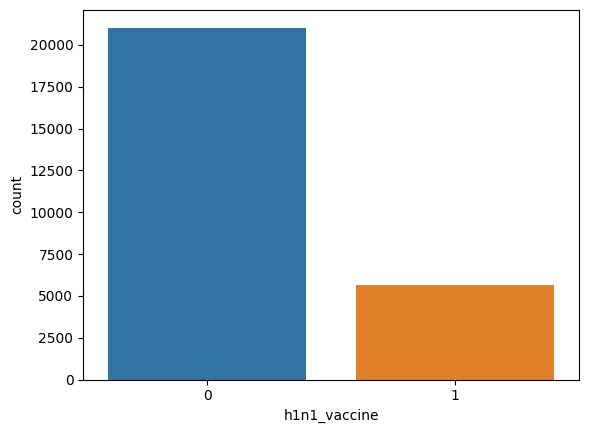

In [16]:
sns.countplot(x="h1n1_vaccine",data=df)

In [20]:
pd.crosstab(df["h1n1_vaccine"],df["sex"])

sex,Female,Male
h1n1_vaccine,,
0,12378,8655
1,3480,2194


In [21]:
pd.crosstab(df["h1n1_vaccine"],df["age_bracket"])

age_bracket,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years
h1n1_vaccine,,,,,
0,4224,3087,4218,4212,5292
1,991,761,1020,1351,1551


<AxesSubplot: xlabel='h1n1_vaccine', ylabel='count'>

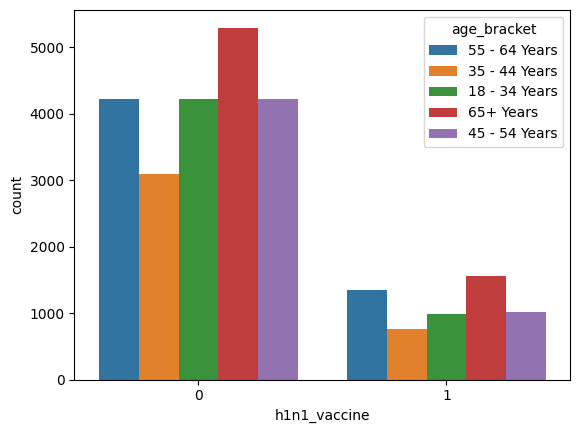

In [25]:
sns.countplot(x="h1n1_vaccine",hue="age_bracket",data=df)

<AxesSubplot: xlabel='h1n1_vaccine', ylabel='count'>

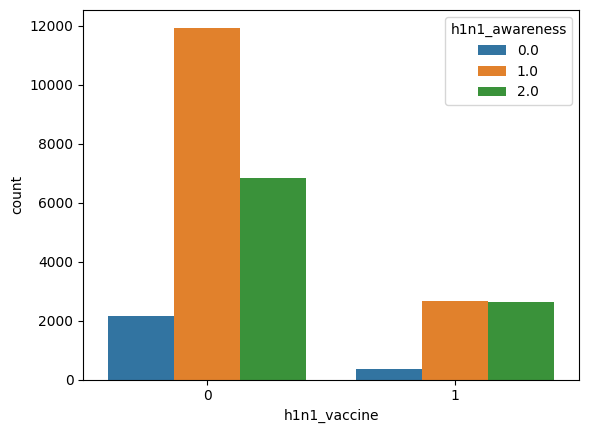

In [26]:
sns.countplot(x="h1n1_vaccine",hue="h1n1_awareness",data=df)

<AxesSubplot: xlabel='h1n1_vaccine', ylabel='count'>

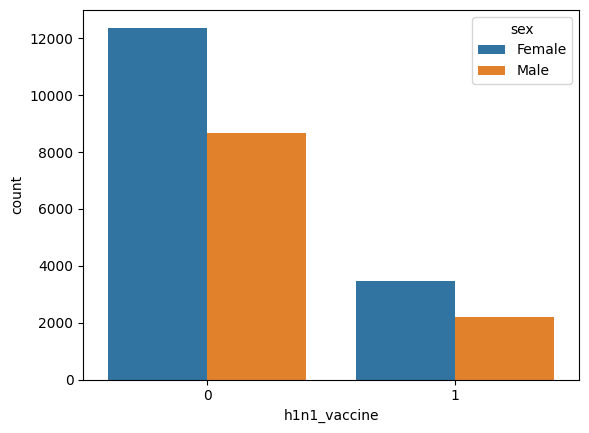

In [27]:
sns.countplot(x="h1n1_vaccine",hue="sex",data=df)

In [28]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

<AxesSubplot: xlabel='h1n1_vaccine', ylabel='age_bracket'>

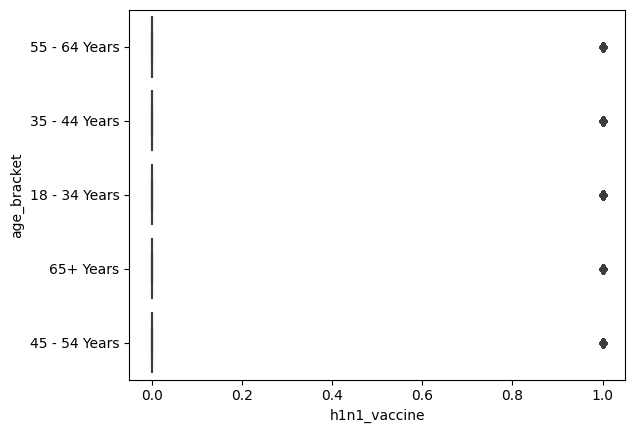

In [31]:
sns.boxplot(x="h1n1_vaccine",y="age_bracket",data=df)

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [32]:
df.drop("unique_id",axis=1,inplace=True)

In [33]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [43]:
df.shape

(11794, 31)

In [45]:
df.columns

Index(['h1n1_awareness', 'contact_avoidance', 'bought_face_mask',
       'wash_hands_frequently', 'avoid_large_gatherings',
       'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc',
       'dr_recc_seasonal_vacc', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur',
       'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc',
       'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc',
       'age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

drop the columns that are not required at all

In [46]:
df.drop(['contact_avoidance', 'bought_face_mask',
       'wash_hands_frequently', 'avoid_large_gatherings',
       'reduced_outside_home_cont', 'avoid_touch_face','chronic_medic_condition',
       'cont_child_undr_6_mnths','has_health_insur', 'is_h1n1_risky', 'sick_from_h1n1_vacc',
       'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc','qualification', 'race','income_level',
       'marital_status', 'housing_status', 'employment','census_msa','no_of_adults', 'no_of_children'],axis=1,inplace=True)

In [48]:
df.shape

(11794, 8)

In [49]:
df.head()

,h1n1_awareness,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,is_health_worker,is_h1n1_vacc_effective,age_bracket,sex,h1n1_vaccine
0,0.0,0.0,0.0,0.0,3.0,55 - 64 Years,Female,0
1,2.0,0.0,0.0,0.0,5.0,35 - 44 Years,Male,0
7,0.0,1.0,0.0,0.0,5.0,45 - 54 Years,Female,1
9,1.0,0.0,0.0,0.0,4.0,55 - 64 Years,Male,0
10,1.0,0.0,0.0,0.0,4.0,45 - 54 Years,Male,1


In [50]:
df=pd.get_dummies(df,columns=['age_bracket','sex'])

In [51]:
df.head()

,h1n1_awareness,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,is_health_worker,is_h1n1_vacc_effective,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Female,sex_Male
0,0.0,0.0,0.0,0.0,3.0,0,0,0,0,1,0,1,0
1,2.0,0.0,0.0,0.0,5.0,0,0,1,0,0,0,0,1
7,0.0,1.0,0.0,0.0,5.0,1,0,0,1,0,0,1,0
9,1.0,0.0,0.0,0.0,4.0,0,0,0,0,1,0,0,1
10,1.0,0.0,0.0,0.0,4.0,1,0,0,1,0,0,0,1


Finding correlation

In [177]:
corr_matrix = df.corr()
corr_matrix['h1n1_vaccine'].sort_values(ascending=False)

h1n1_vaccine                 1.000000
dr_recc_h1n1_vacc            0.415482
is_h1n1_vacc_effective       0.333996
dr_recc_seasonal_vacc        0.227821
h1n1_awareness               0.160849
age_bracket_55 - 64 Years    0.054251
sex_Female                   0.009164
sex_Male                    -0.009164
is_health_worker                  NaN
age_bracket_18 - 34 Years         NaN
age_bracket_35 - 44 Years         NaN
age_bracket_45 - 54 Years         NaN
age_bracket_65+ Years             NaN
Name: h1n1_vaccine, dtype: float64

In [52]:
df.dtypes

h1n1_awareness               float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
h1n1_vaccine                   int64
age_bracket_18 - 34 Years      uint8
age_bracket_35 - 44 Years      uint8
age_bracket_45 - 54 Years      uint8
age_bracket_55 - 64 Years      uint8
age_bracket_65+ Years          uint8
sex_Female                     uint8
sex_Male                       uint8
dtype: object

Identifying the outliers

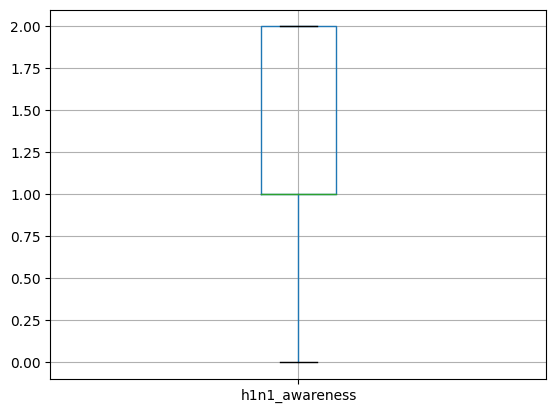

In [57]:
df.boxplot(column="h1n1_awareness")
plt.show()

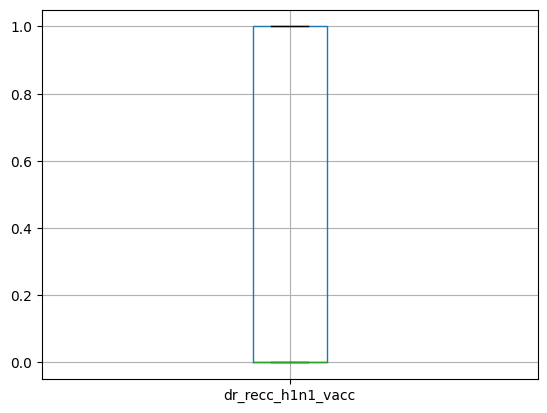

In [58]:
df.boxplot(column="dr_recc_h1n1_vacc")
plt.show()

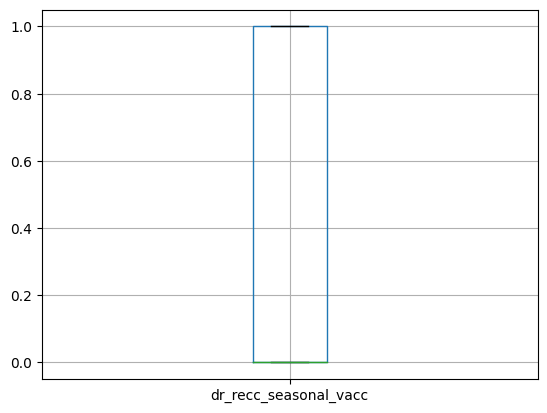

In [59]:
df.boxplot(column="dr_recc_seasonal_vacc")
plt.show()

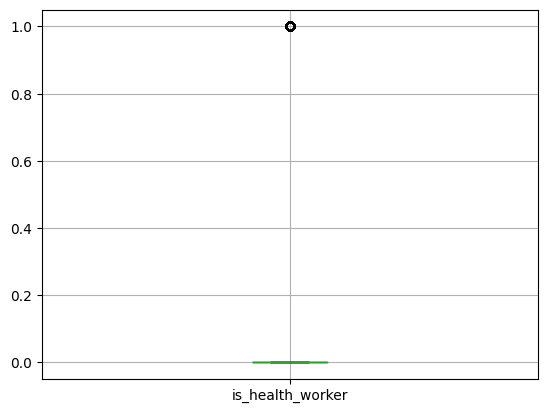

In [56]:
df.boxplot(column="is_health_worker")
plt.show()

Removing the outliers

In [60]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
   
    return lower_bound,upper_bound

In [61]:
lowacc,highacc=remove_outlier(df["is_health_worker"])

In [62]:
df["is_health_worker"]=np.where(df["is_health_worker"]>highacc,highacc,df["is_health_worker"])
df["is_health_worker"]=np.where(df["is_health_worker"]<lowacc,lowacc,df["is_health_worker"])

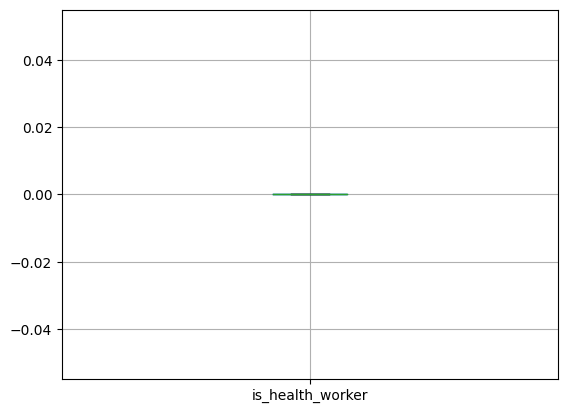

In [63]:
df.boxplot(column="is_health_worker")
plt.show()

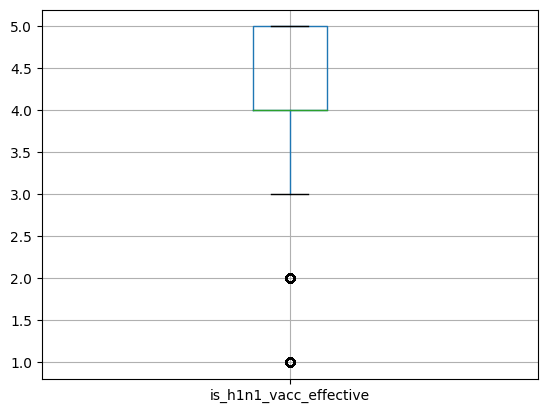

In [65]:
df.boxplot(column="is_h1n1_vacc_effective")
plt.show()

In [66]:
lowacc,highacc=remove_outlier(df["is_h1n1_vacc_effective"])

In [67]:
df["is_h1n1_vacc_effective"]=np.where(df["is_h1n1_vacc_effective"]>highacc,highacc,df["is_h1n1_vacc_effective"])
df["is_h1n1_vacc_effective"]=np.where(df["is_h1n1_vacc_effective"]<lowacc,lowacc,df["is_h1n1_vacc_effective"])

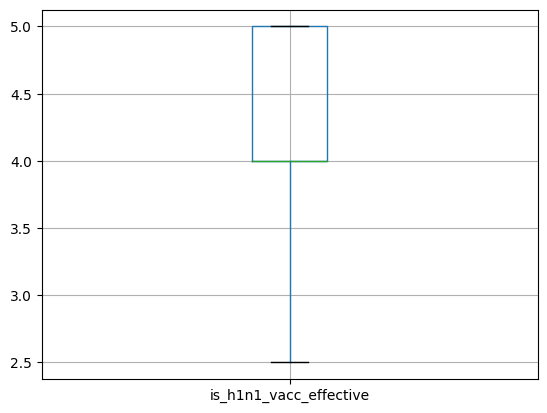

In [68]:
df.boxplot(column="is_h1n1_vacc_effective")
plt.show()

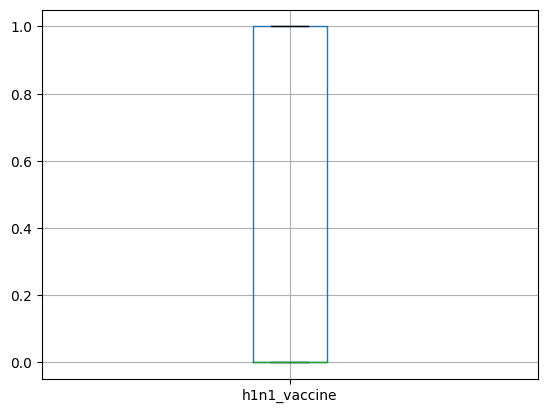

In [70]:
df.boxplot(column="h1n1_vaccine")
plt.show()

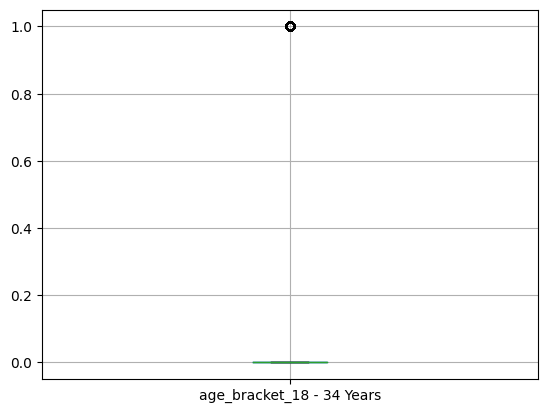

In [78]:
df.boxplot(column="age_bracket_18 - 34 Years")
plt.show()

In [79]:
lowacc,highacc=remove_outlier(df["age_bracket_18 - 34 Years"])

In [80]:
df["age_bracket_18 - 34 Years"]=np.where(df["age_bracket_18 - 34 Years"]>highacc,highacc,df["age_bracket_18 - 34 Years"])
df["age_bracket_18 - 34 Years"]=np.where(df["age_bracket_18 - 34 Years"]<lowacc,lowacc,df["age_bracket_18 - 34 Years"])

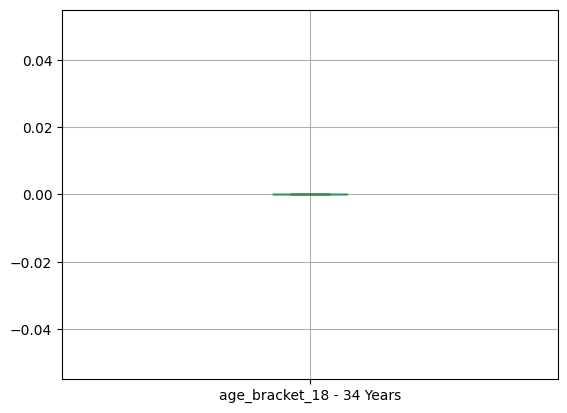

In [81]:
df.boxplot(column="age_bracket_18 - 34 Years")
plt.show()

In [82]:
lowacc,highacc=remove_outlier(df["age_bracket_35 - 44 Years"])

In [83]:
df["age_bracket_35 - 44 Years"]=np.where(df["age_bracket_35 - 44 Years"]>highacc,highacc,df["age_bracket_35 - 44 Years"])
df["age_bracket_35 - 44 Years"]=np.where(df["age_bracket_35 - 44 Years"]<lowacc,lowacc,df["age_bracket_35 - 44 Years"])

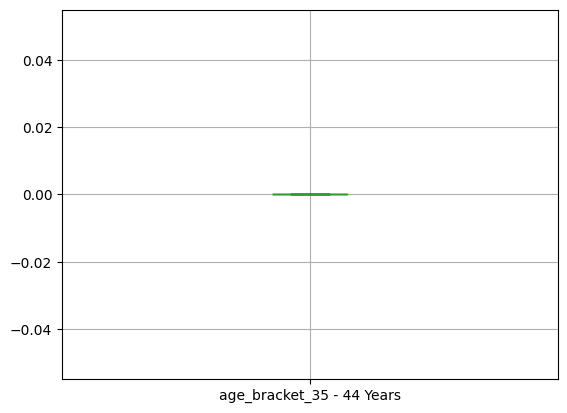

In [84]:
df.boxplot(column="age_bracket_35 - 44 Years")
plt.show()

In [89]:
lowacc,highacc=remove_outlier(df["age_bracket_45 - 54 Years"])

In [86]:
df["age_bracket_45 - 54 Years"]=np.where(df["age_bracket_45 - 54 Years"]>highacc,highacc,df["age_bracket_45 - 54 Years"])
df["age_bracket_45 - 54 Years"]=np.where(df["age_bracket_45 - 54 Years"]<lowacc,lowacc,df["age_bracket_45 - 54 Years"])

In [90]:
lowacc,highacc=remove_outlier(df["age_bracket_65+ Years"])

In [91]:
df["age_bracket_65+ Years"]=np.where(df["age_bracket_65+ Years"]>highacc,highacc,df["age_bracket_65+ Years"])
df["age_bracket_65+ Years"]=np.where(df["age_bracket_65+ Years"]<lowacc,lowacc,df["age_bracket_65+ Years"])

In [92]:
df.shape

(11794, 13)

In [93]:
df.dtypes

h1n1_awareness               float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
h1n1_vaccine                   int64
age_bracket_18 - 34 Years    float64
age_bracket_35 - 44 Years    float64
age_bracket_45 - 54 Years    float64
age_bracket_55 - 64 Years      uint8
age_bracket_65+ Years        float64
sex_Female                     uint8
sex_Male                       uint8
dtype: object

Target variable is h1n1_vaccine

In [94]:
x=df.drop(['h1n1_vaccine'],axis=1)
y=df[['h1n1_vaccine']]

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

Using LogisticRegressor

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
model=LogisticRegression()

In [112]:
model.fit(x_train,y_train)

LogisticRegression()

In [113]:
model.score(x_train,y_train)

0.7779527559055118

In [114]:
model.score(x_test,y_test)

0.7801638881039842

In [115]:
pred=model.predict(x_test) #predicted values

In [130]:
accuracy_score(y_test,pred)

0.7787510596213619

Using DecussionTreeClassifier

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
model=DecisionTreeClassifier(max_depth=15,max_features=8)

In [144]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, max_features=8)

In [145]:
model.score(x_train,y_train)

0.7890975166565718

In [146]:
model.score(x_test,y_test)

0.7787510596213619

In [147]:
pred=model.predict(x_test)

In [148]:
accuracy_score(y_test,pred)

0.7787510596213619

model using AdaBoostClassifier

In [152]:
from sklearn.ensemble import AdaBoostClassifier

In [153]:
model=AdaBoostClassifier()

In [154]:
model.fit(x_train,y_train)

AdaBoostClassifier()

In [155]:
model.score(x_train,y_train)

0.780496668685645

In [156]:
model.score(x_test,y_test)

0.7756428369595931

Model using RandomForestClassifier

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
model=RandomForestClassifier()

In [172]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [173]:
model.score(x_train,y_train)

0.7890975166565718

In [174]:
model.score(x_test,y_test)

0.7793161910144109

In [175]:
pred=model.predict(x_test)

In [176]:
accuracy_score(y_test,pred)

0.7793161910144109

THEREFORE THE NUMBER OF PEOPLE WHO ARE VACCINATED BY H1N1 VACCINE IS ALMOST 0.77%